# Step "1" Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Step "2" Data Collection and Analysis

# PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# step "3" Exploratory Data Analysis

# 3.1  Initial Data Inspection:

                    #Get a high-level overview of the dataset.
                       #Check the number of rows and columns.
                          #Examine the first few rows to understand the data structure.

In [4]:

# Get the number of rows and columns
num_rows, num_cols = diabetes_dataset.shape


# Display the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Display the first few rows to understand the data structure
print("\nFirst few rows of the dataset:")
print(diabetes_dataset.head())


Number of rows: 768
Number of columns: 9

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# 3.2 Handling Missing Data:

                #Identify and handle missing data.
                

In [5]:

# Check for missing values in each column
missing_values_in_diabetes_dataset = diabetes_dataset.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values_in_diabetes_dataset[missing_values_in_diabetes_dataset > 0])

# Handle missing values (you can choose one or more of these strategies)
# 1. Remove rows with missing values
diabetes_dataset_cleaned = diabetes_dataset.dropna()

# 2. Impute missing values with mean, median, or a specific value
df_cleaned = diabetes_dataset.fillna(diabetes_dataset.mean())
df_cleaned = diabetes_dataset.fillna(diabetes_dataset.median())
df_cleaned = diabetes_dataset.fillna(0)  # Replace missing values with 0

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)

Columns with missing values:
Series([], dtype: int64)
Cleaned DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Ou

# 3.3 Outlier Detection
           # Identify and analyze outliers
            #  box plots or scatter plots for outlier detection

In [6]:
#  Box plot 

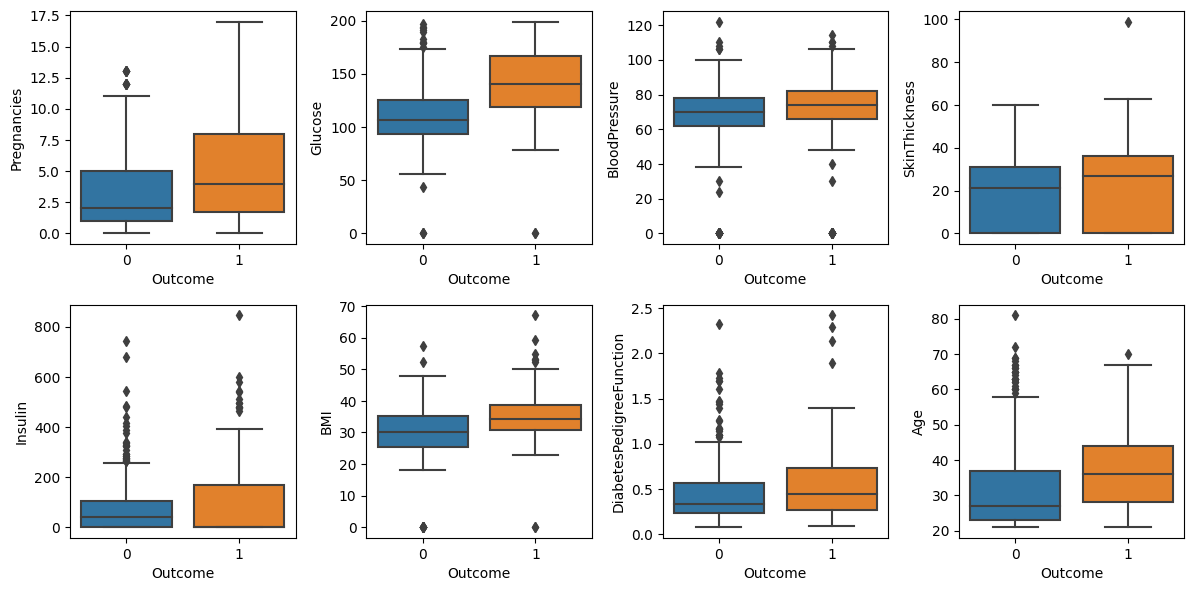

In [7]:

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))

# Box plot for numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset)

plt.tight_layout()
plt.show()


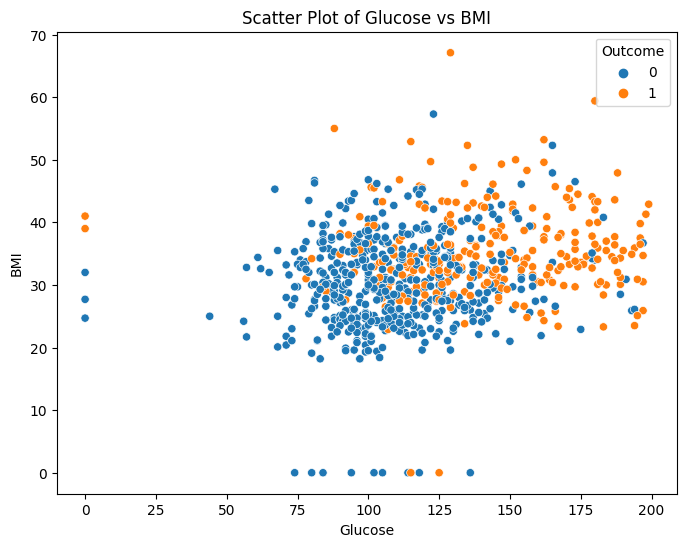

In [8]:
# Scatter plot
# Scatter plot for two numerical features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=diabetes_dataset)
plt.title('Scatter Plot of Glucose vs BMI')
plt.show()


# 3.4 Visualizations

In [9]:
# pair Plot

C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


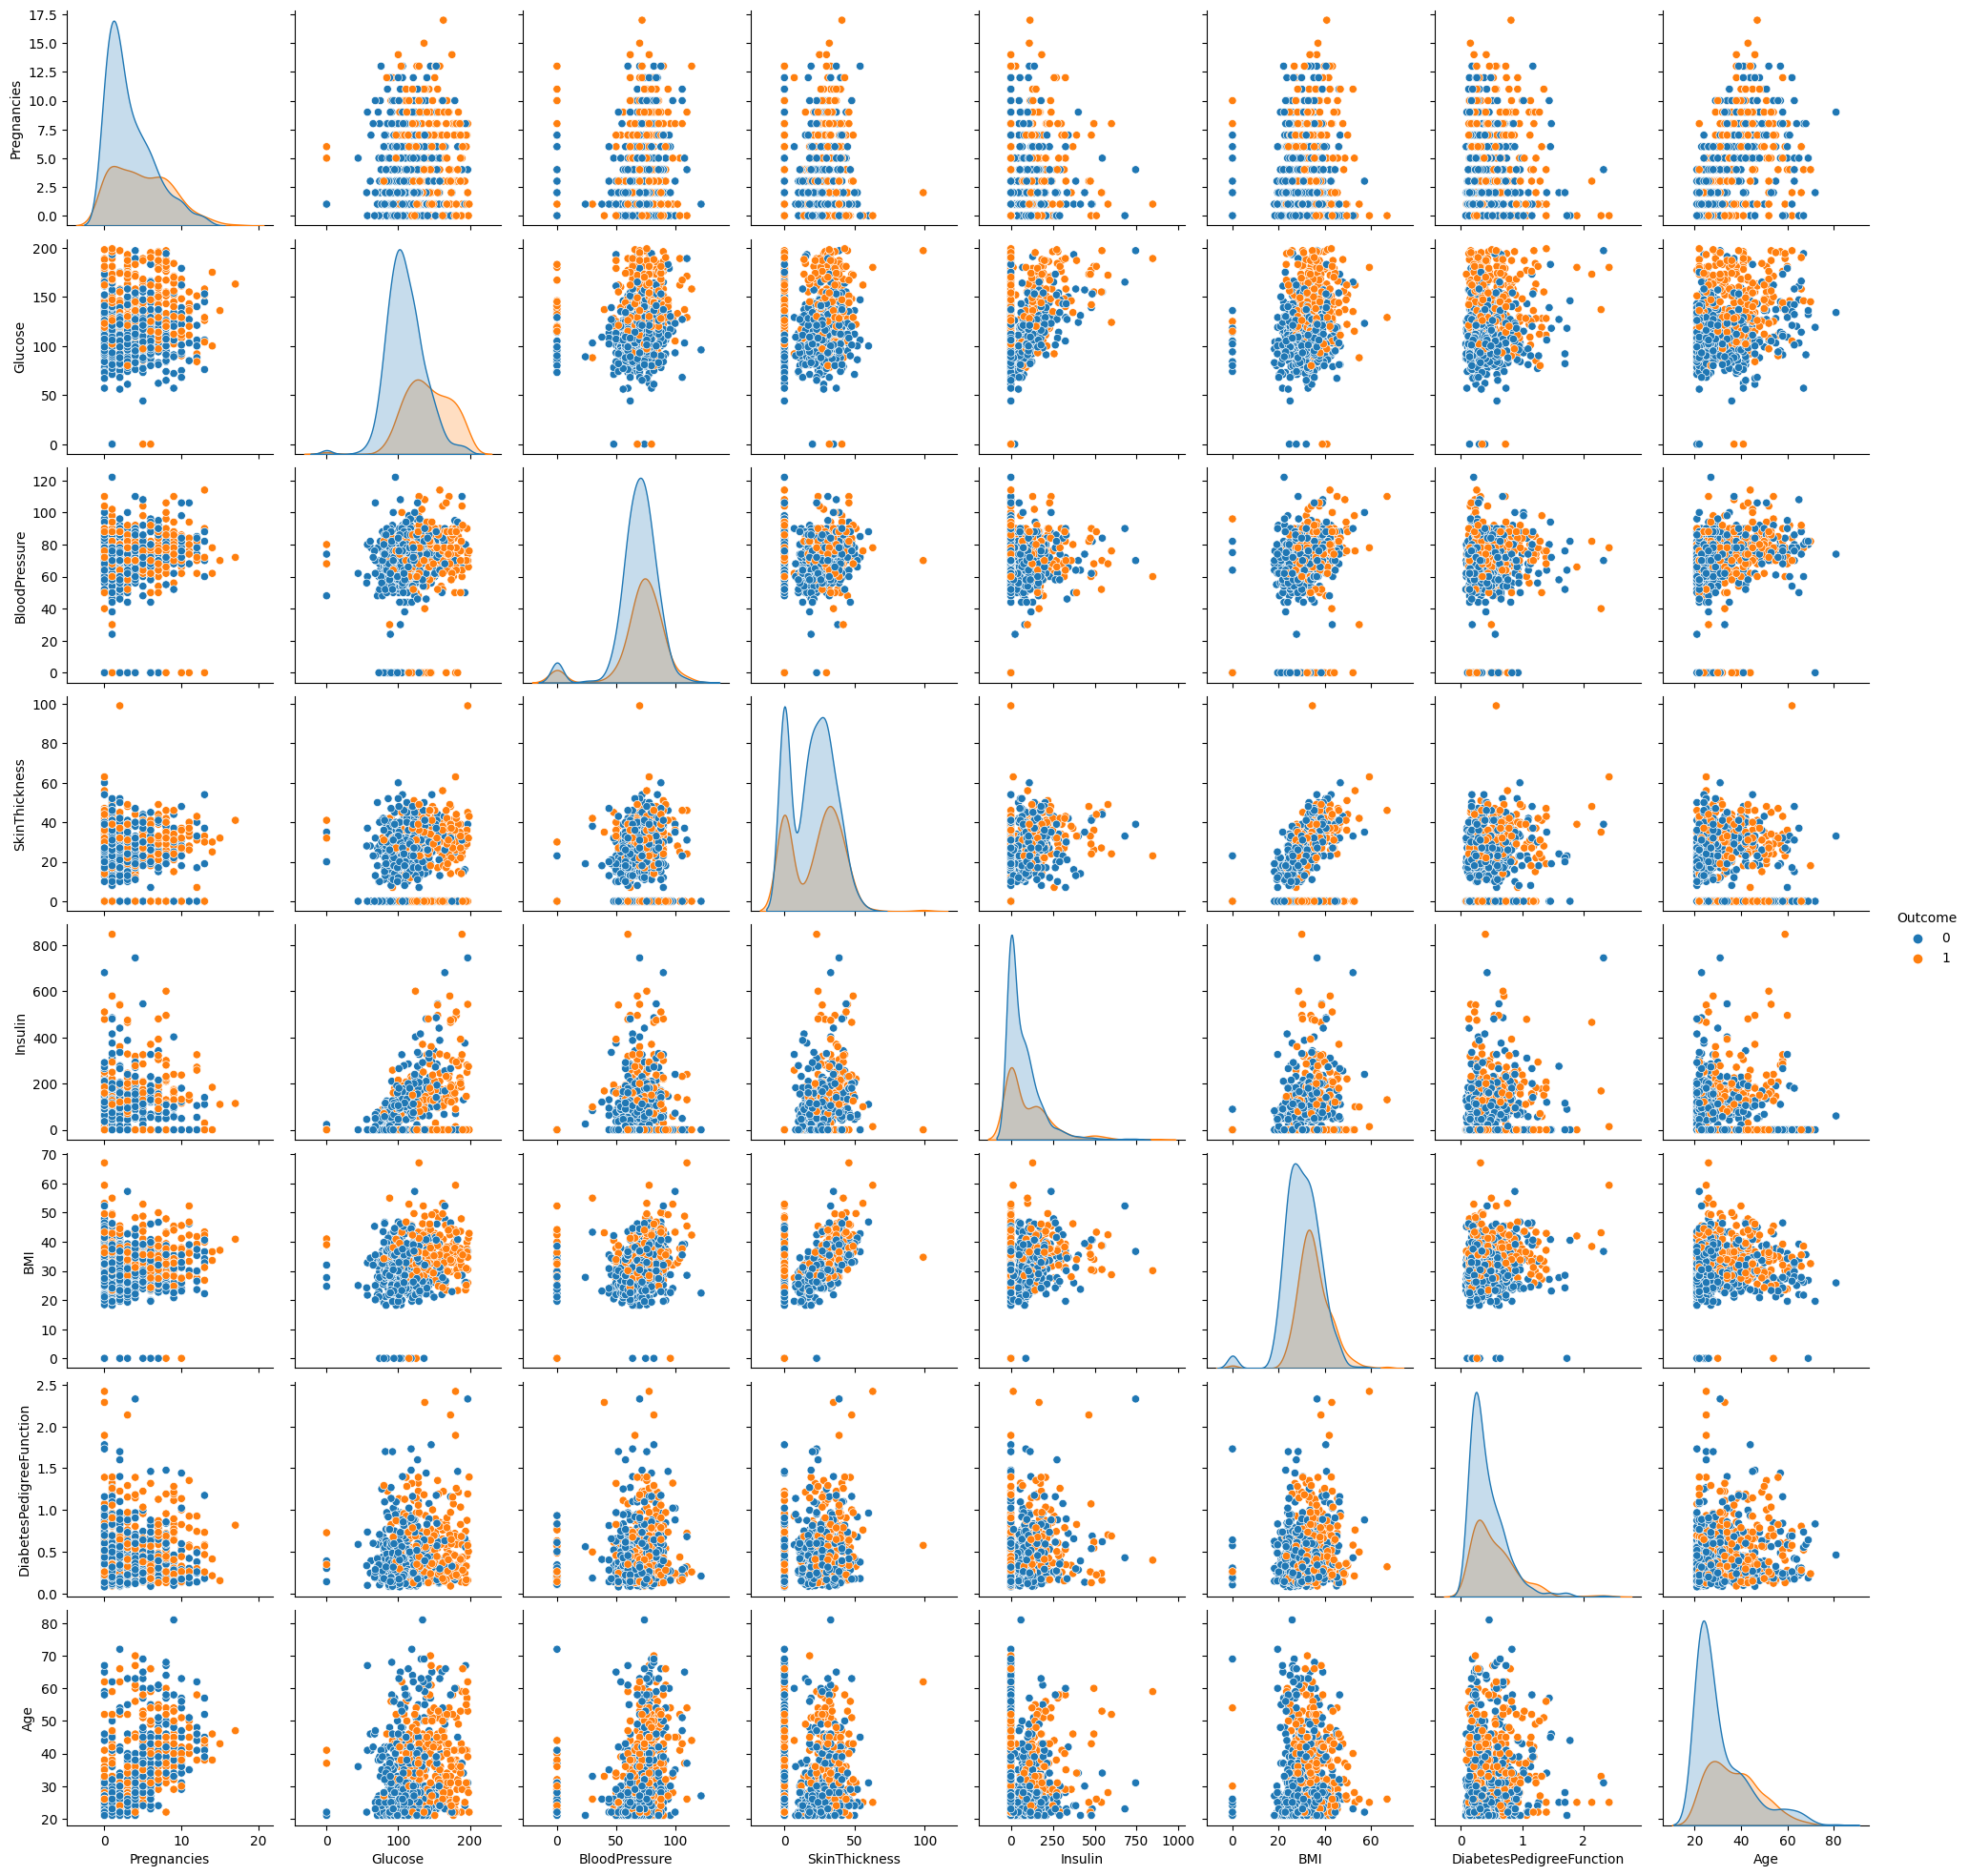

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named diabetes_dataset
sns.pairplot(diabetes_dataset, hue='Outcome', diag_kind='kde')
plt.show()


In [11]:
# Correlation Plot

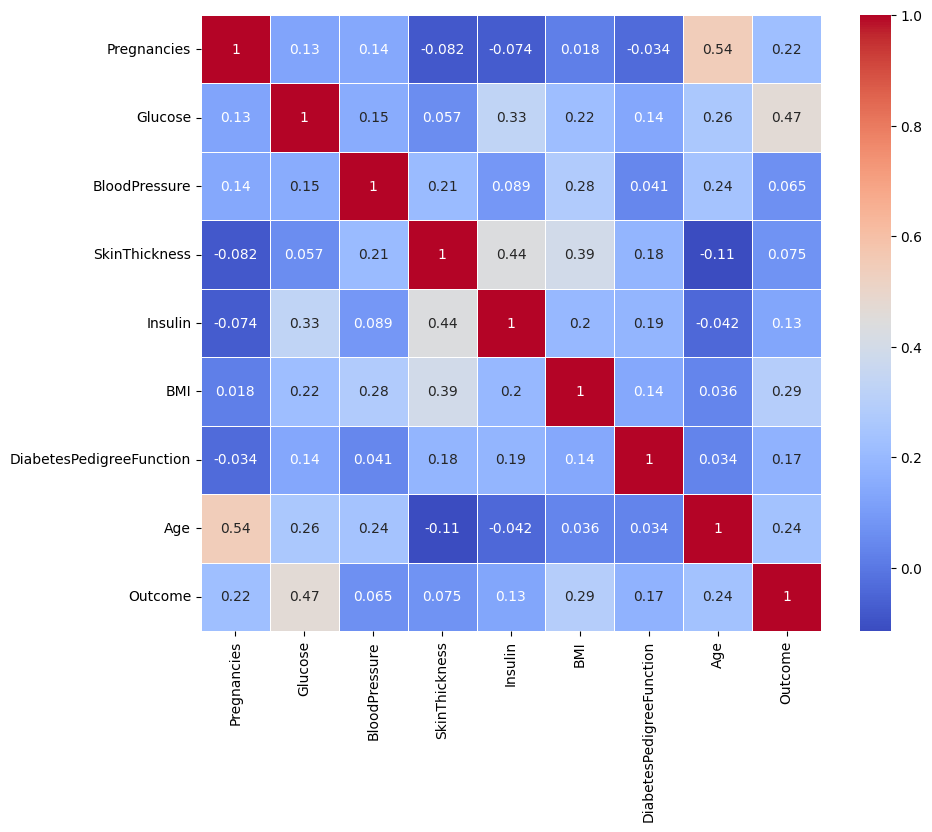

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [13]:
# Count Plot

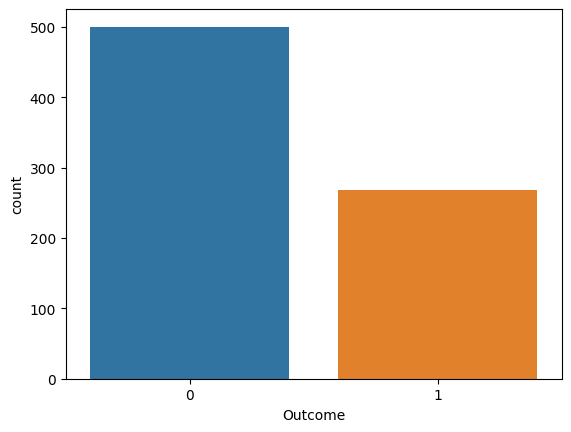

In [14]:
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.show()


In [15]:
# Histogram

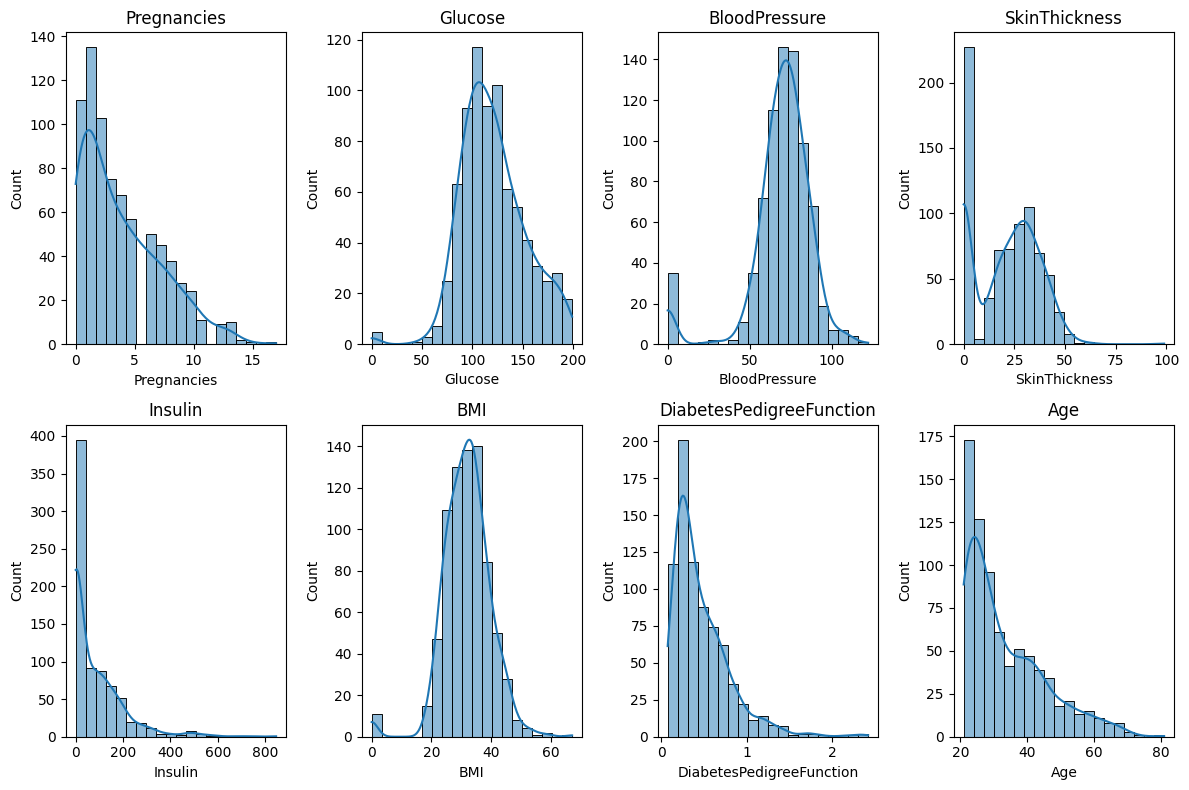

In [16]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(diabetes_dataset.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.histplot(diabetes_dataset[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


In [17]:
# Box plot

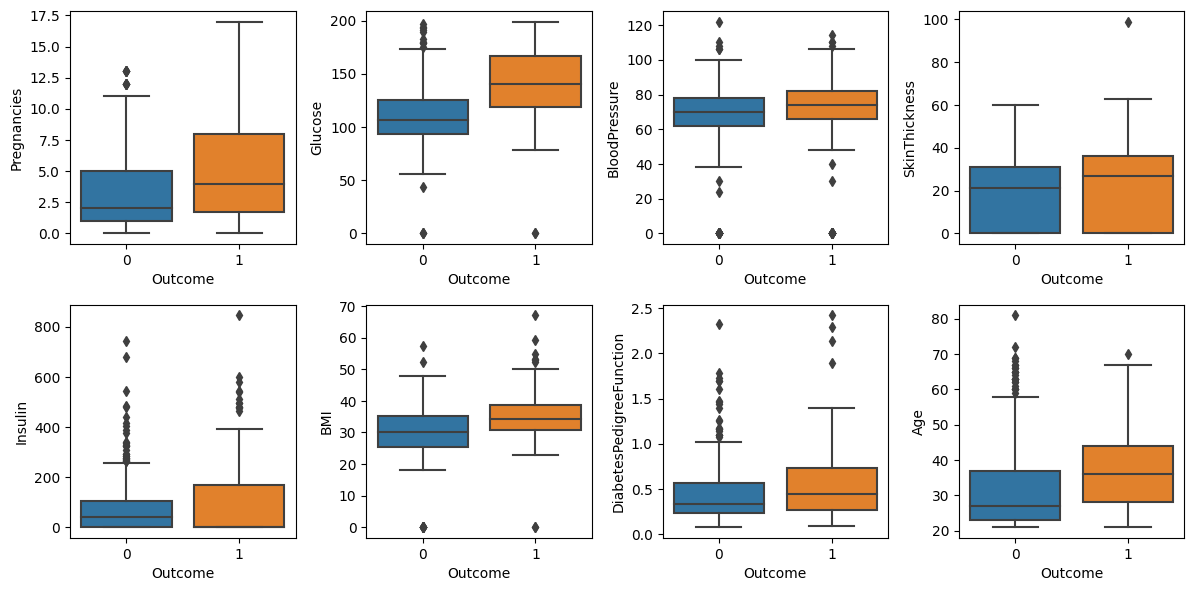

In [18]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(diabetes_dataset.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset)
plt.tight_layout()
plt.show()


In [19]:
# Scatter Plot

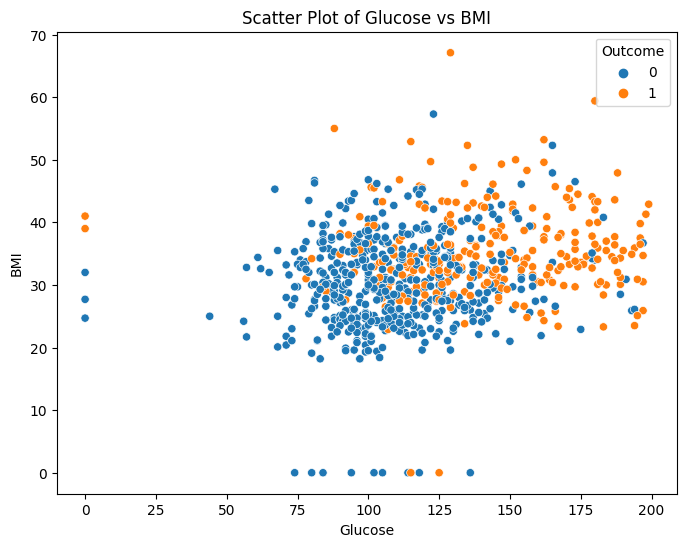

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=diabetes_dataset)
plt.title('Scatter Plot of Glucose vs BMI')
plt.show()


In [21]:
# Violin Plot

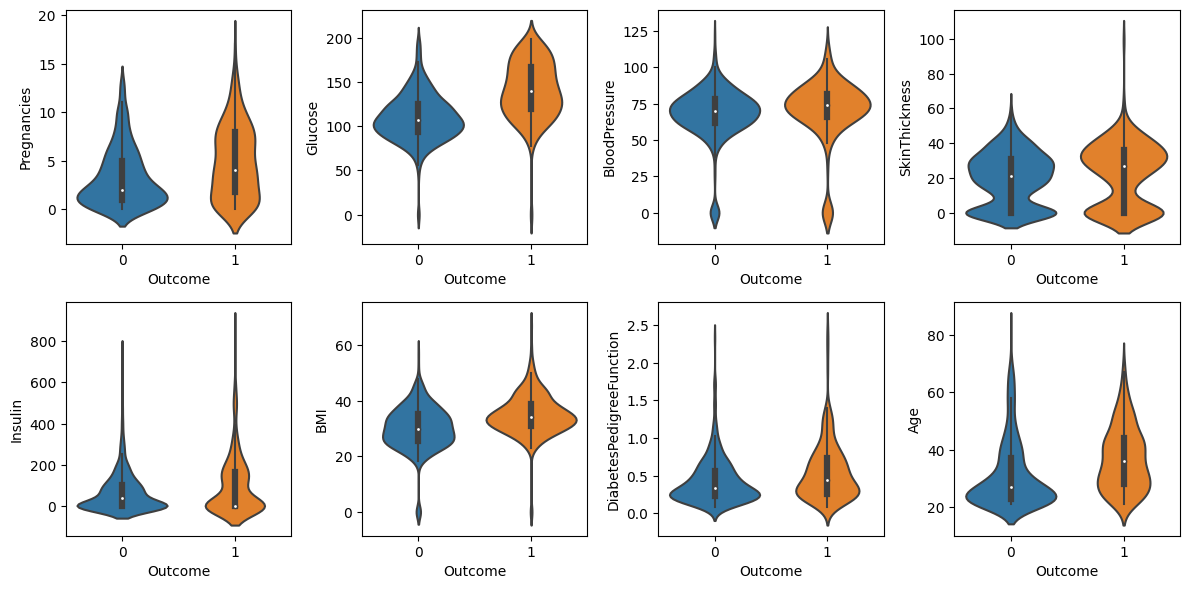

In [22]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(diabetes_dataset.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.violinplot(x='Outcome', y=feature, data=diabetes_dataset)
plt.tight_layout()
plt.show()


In [23]:
# Count Plot for Entire dataset

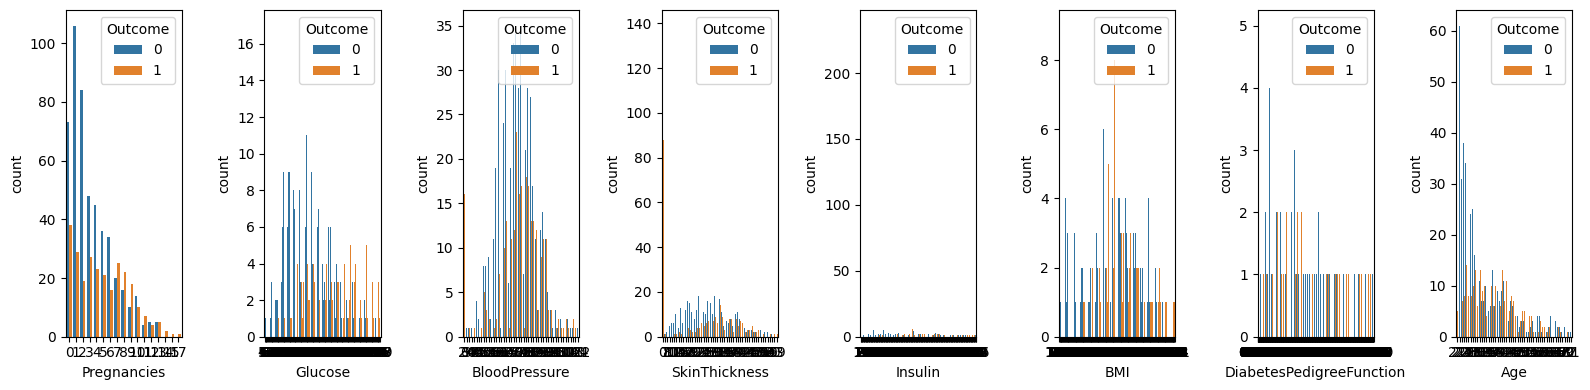

In [24]:


# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(diabetes_dataset.columns[:-1]), figsize=(16, 4))

# Create count plots for each feature
for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    sns.countplot(x=feature, data=diabetes_dataset, hue='Outcome', ax=axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [25]:
# Scatter plot for entire dataset

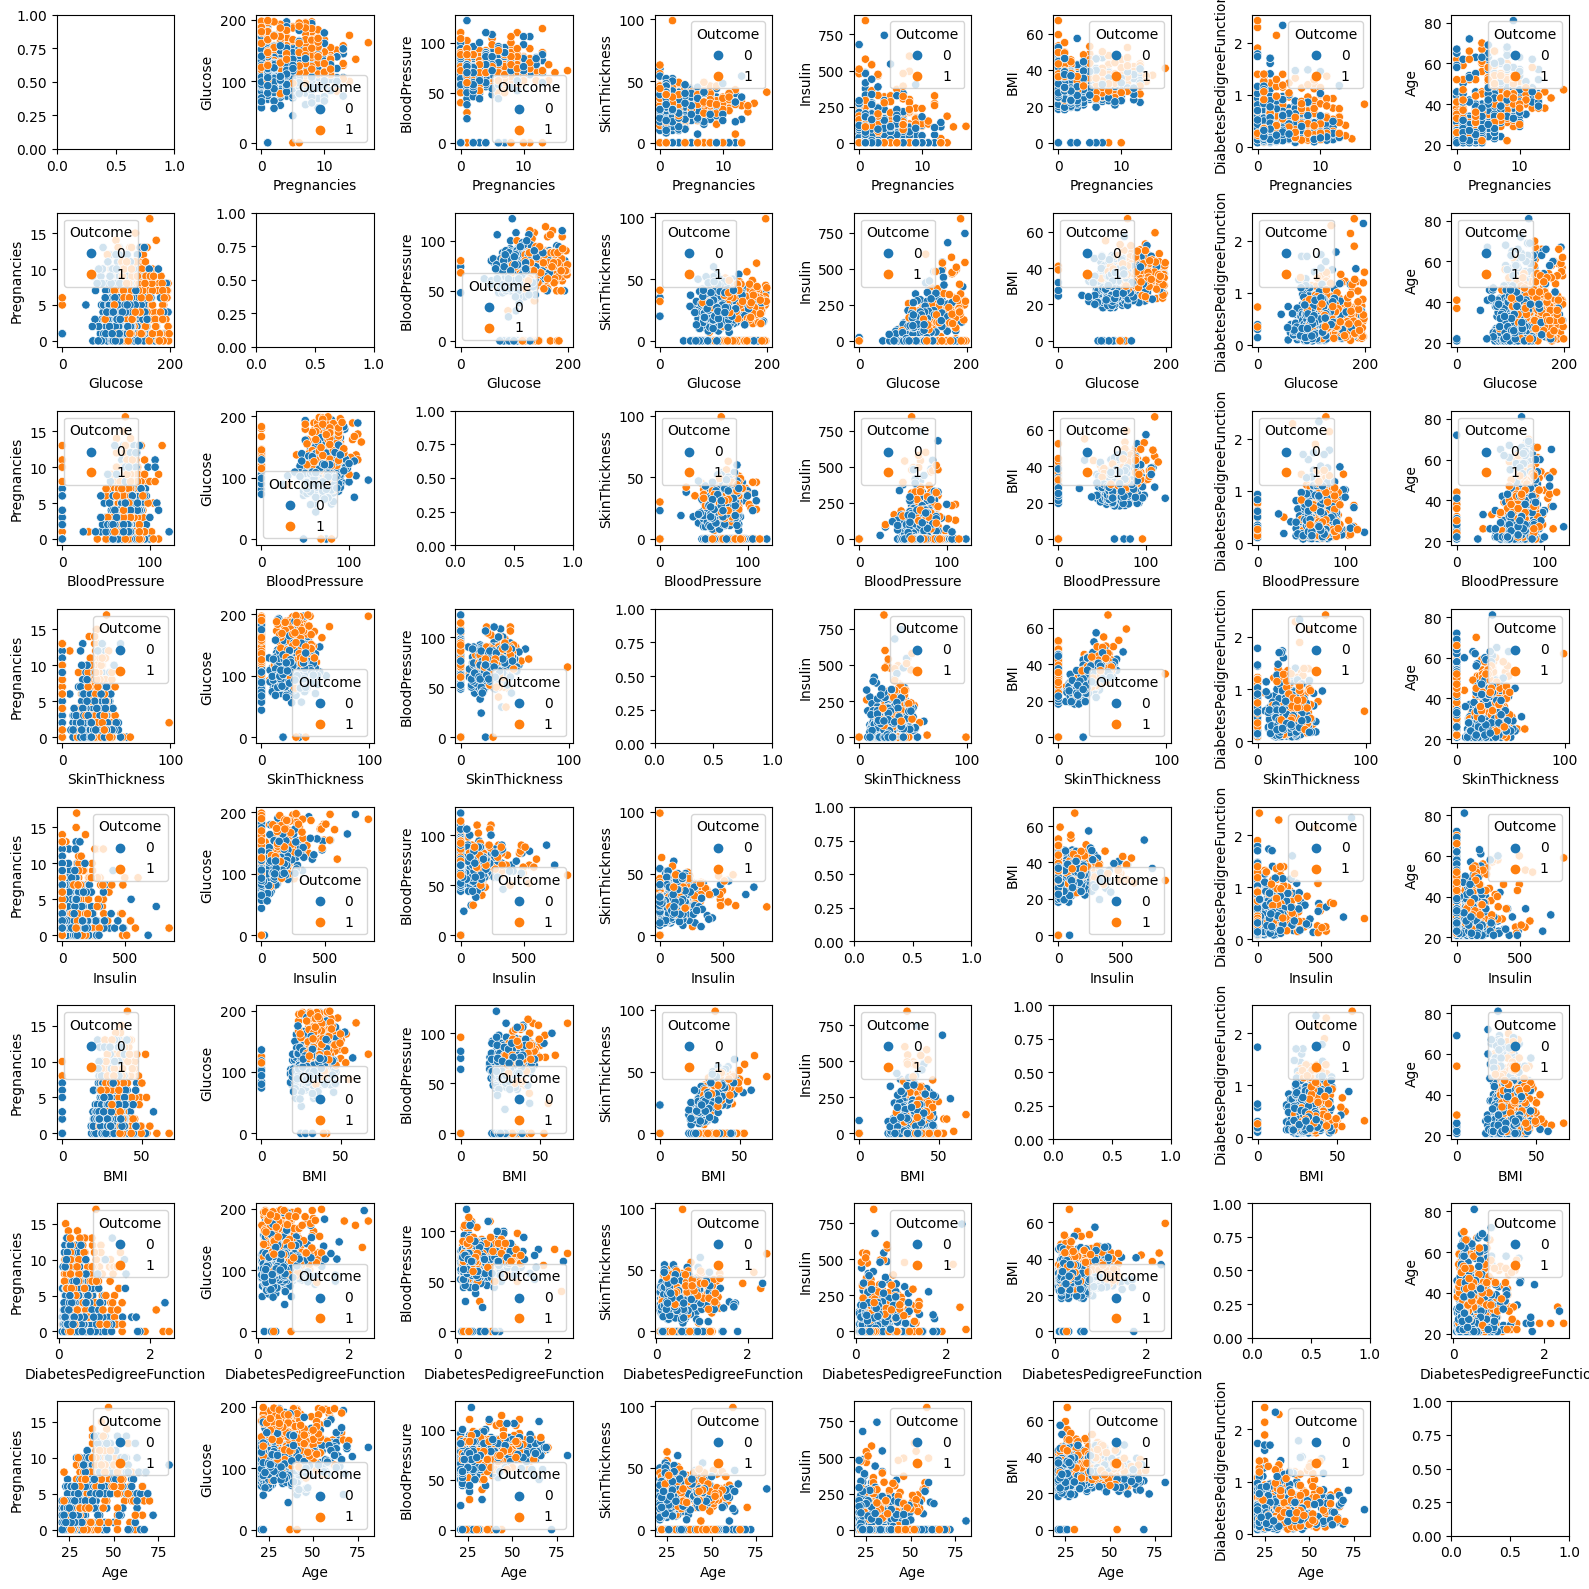

In [26]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(diabetes_dataset.columns[:-1]), ncols=len(diabetes_dataset.columns[:-1]), figsize=(16, 16))

# Create scatter plots for each pair of features
for i, feature1 in enumerate(diabetes_dataset.columns[:-1]):
    for j, feature2 in enumerate(diabetes_dataset.columns[:-1]):
        if i != j:
            sns.scatterplot(x=feature1, y=feature2, hue='Outcome', data=diabetes_dataset, ax=axes[i, j])

# Adjust layout
plt.tight_layout()
plt.show()


# 3.5 Data Distribution Analysis

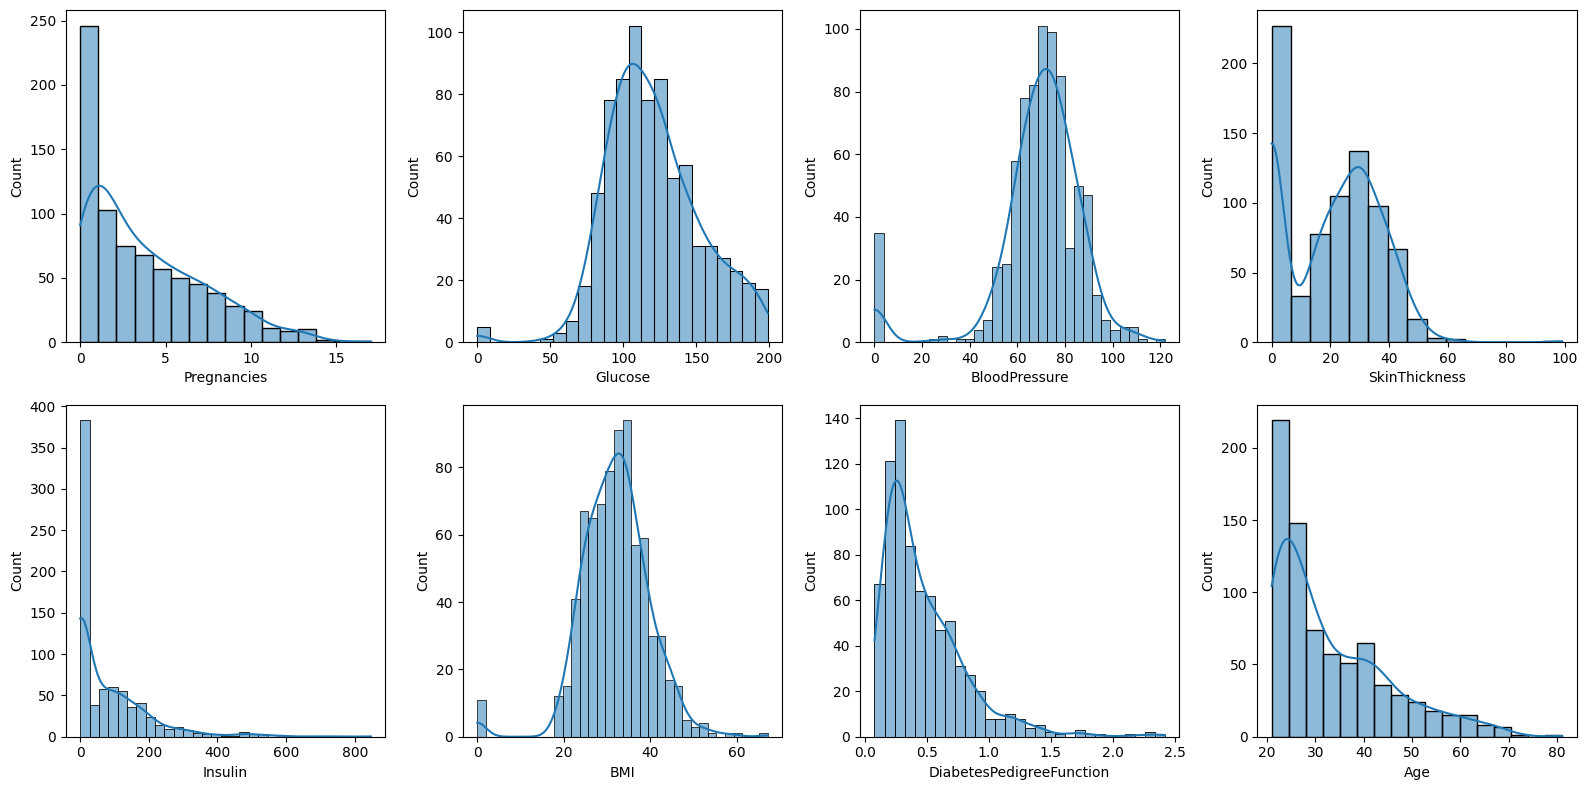

In [27]:

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Create histograms for each numerical feature
for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    sns.histplot(diabetes_dataset[feature], kde=True, ax=axes[i//4, i%4])

# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
# Kernel Density Etimate Plot

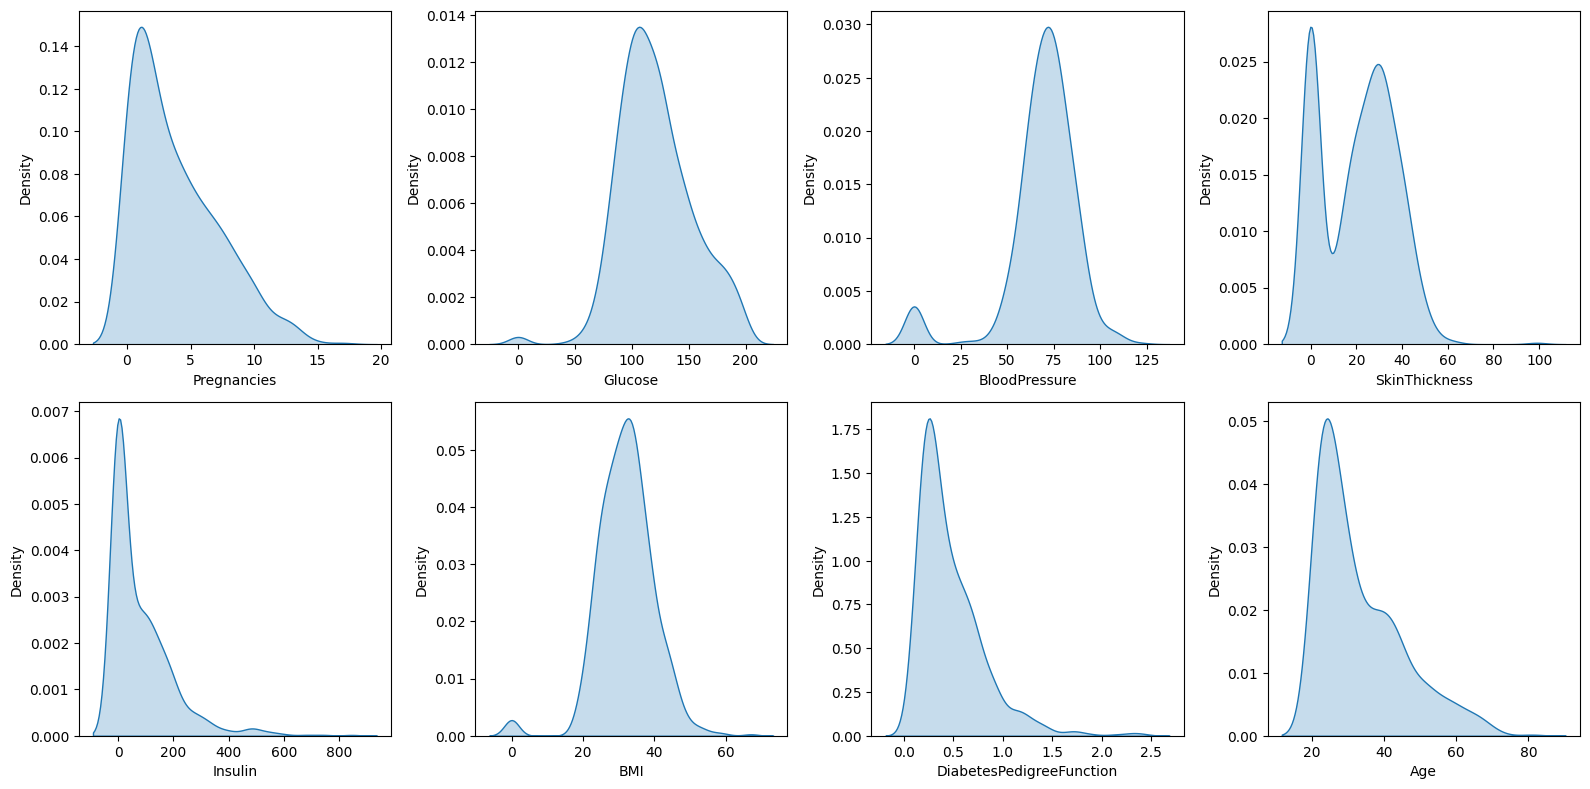

In [29]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Create KDE plots for each numerical feature
for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    sns.kdeplot(diabetes_dataset[feature], fill=True, ax=axes[i//4, i%4])

# Adjust layout
plt.tight_layout()
plt.show()


In [30]:
# Quantile-Quantile Plot 

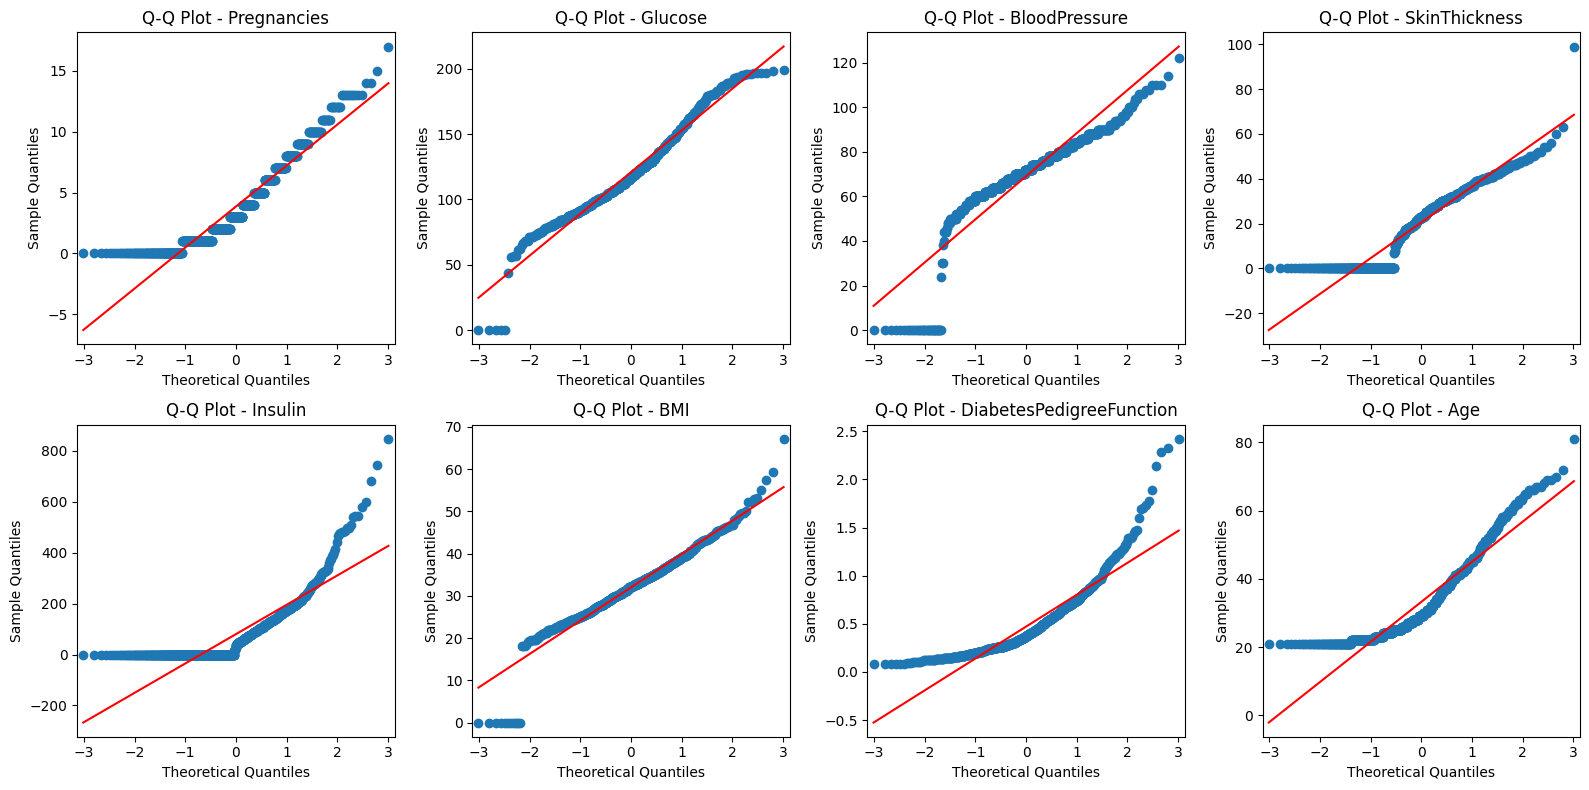

In [31]:
import statsmodels.api as sm
import pylab

# Assuming your dataset is loaded into a DataFrame named diabetes_dataset

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Create Q-Q plots for each numerical feature
for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    sm.qqplot(diabetes_dataset[feature], line='s', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Q-Q Plot - {feature}')

# Adjust layout
plt.tight_layout()
plt.show()


# 3.6 Pattern Recognition 

In [32]:
# Time Series Plot 

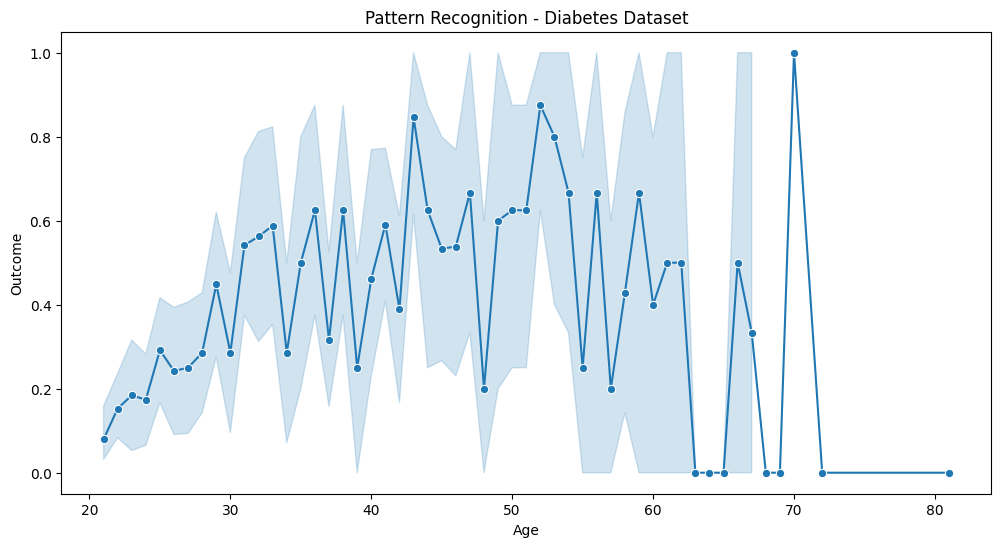

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your diabetes dataset is loaded into a DataFrame named diabetes_dataset

# Set 'Age' as the index (for illustration purposes)
diabetes_dataset.set_index('Age', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(x=diabetes_dataset.index, y='Outcome', data=diabetes_dataset, marker='o')
plt.title('Pattern Recognition - Diabetes Dataset')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()


In [34]:
# pattern recognition sub-graphs 

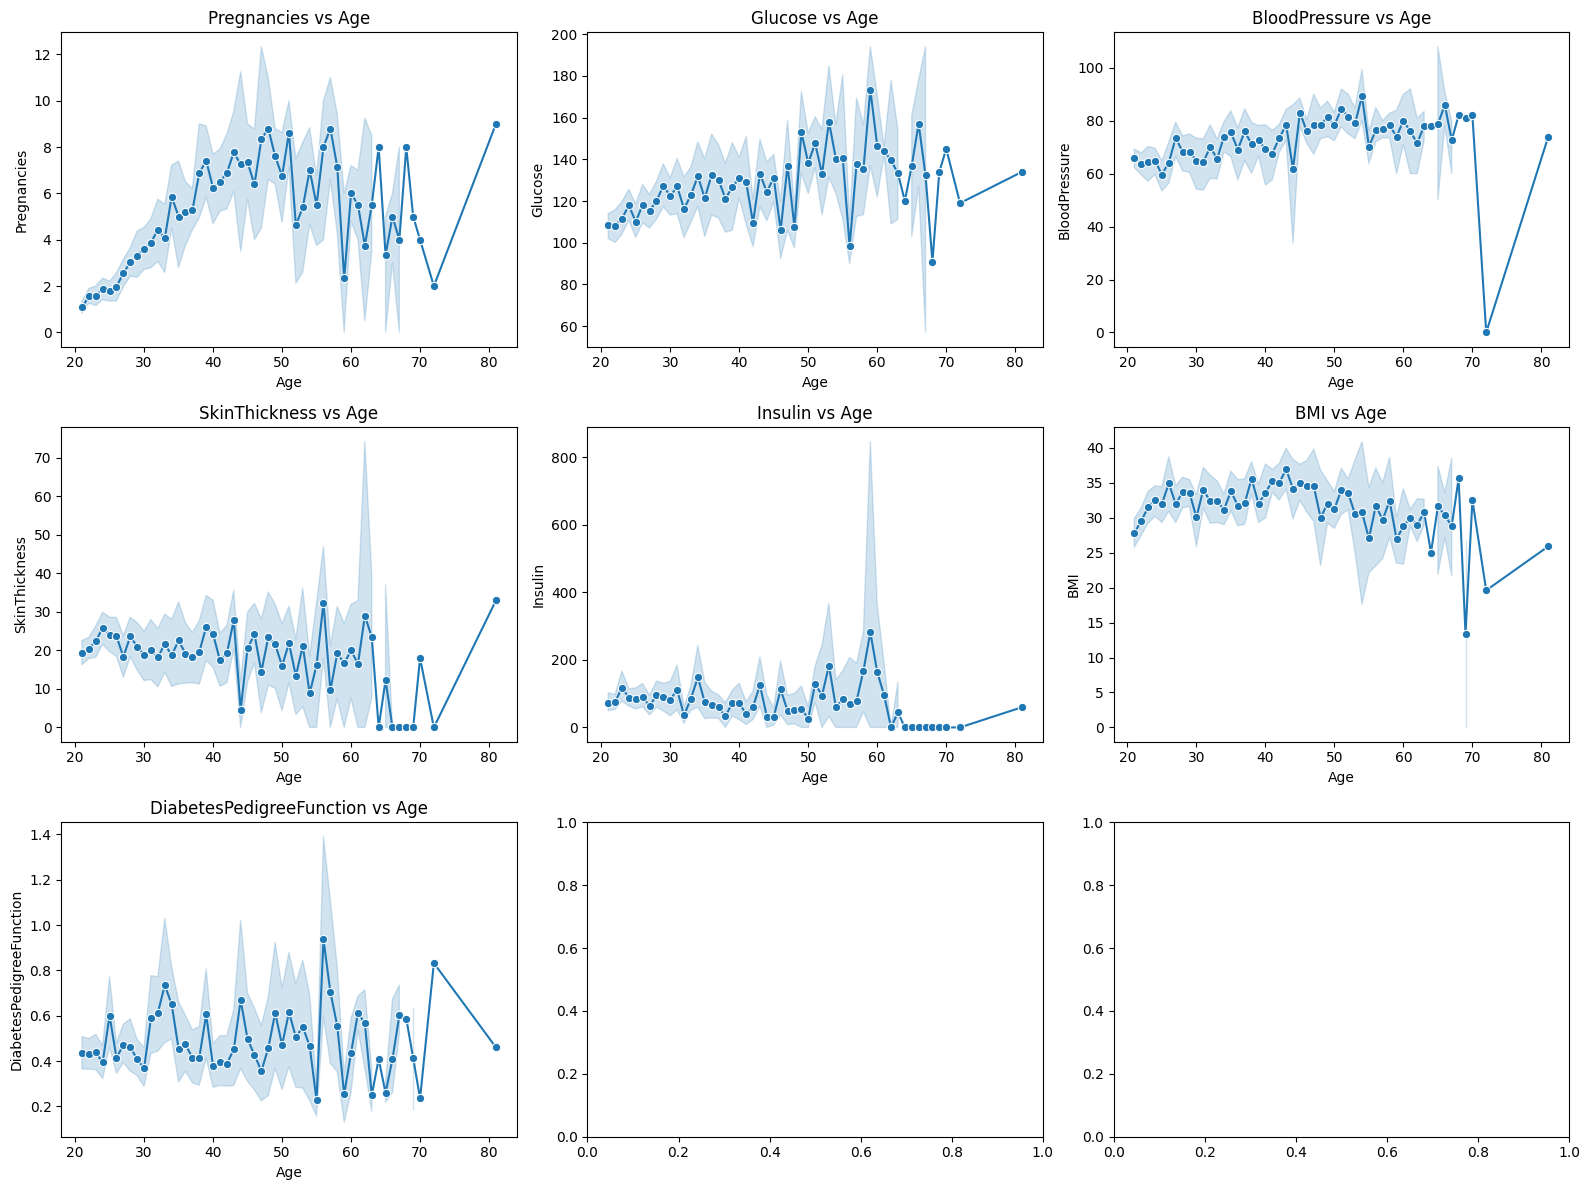

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set up subplots for individual features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Flatten the 3x3 array of subplots
axes = axes.flatten()

# Loop through each feature and create subplots
for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    sns.lineplot(x=diabetes_dataset.index, y=feature, data=diabetes_dataset, marker='o', ax=axes[i])
    axes[i].set_title(f'{feature} vs Age')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()


# 3.7 Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

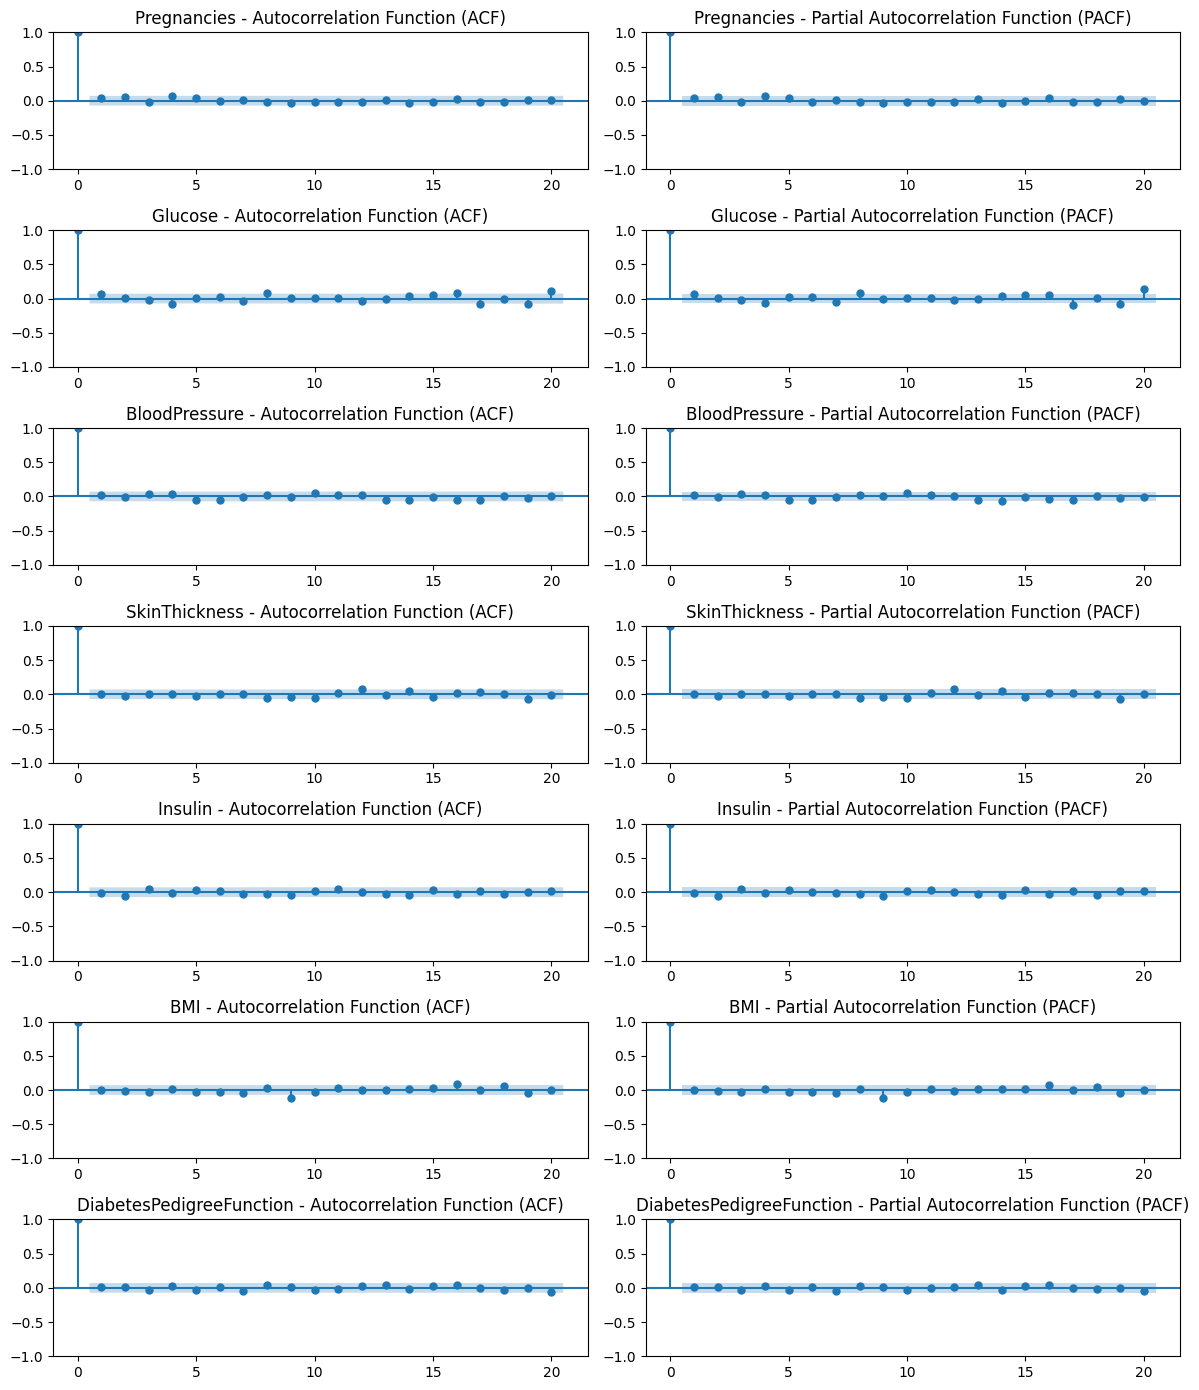

In [36]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming your diabetes dataset is loaded into a DataFrame named diabetes_dataset

# Set up subplots for ACF and PACF
num_features = len(diabetes_dataset.columns[:-1])  # Exclude the 'Outcome' column
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(12, 2 * num_features))

# Loop through each feature and create subplots for ACF and PACF
for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    # Plot ACF
    plot_acf(diabetes_dataset[feature], lags=20, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Autocorrelation Function (ACF)')

    # Plot PACF
    plot_pacf(diabetes_dataset[feature], lags=20, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Partial Autocorrelation Function (PACF)')

# Adjust layout
plt.tight_layout()
plt.show()


# 3.8 Seasonal Decomposition

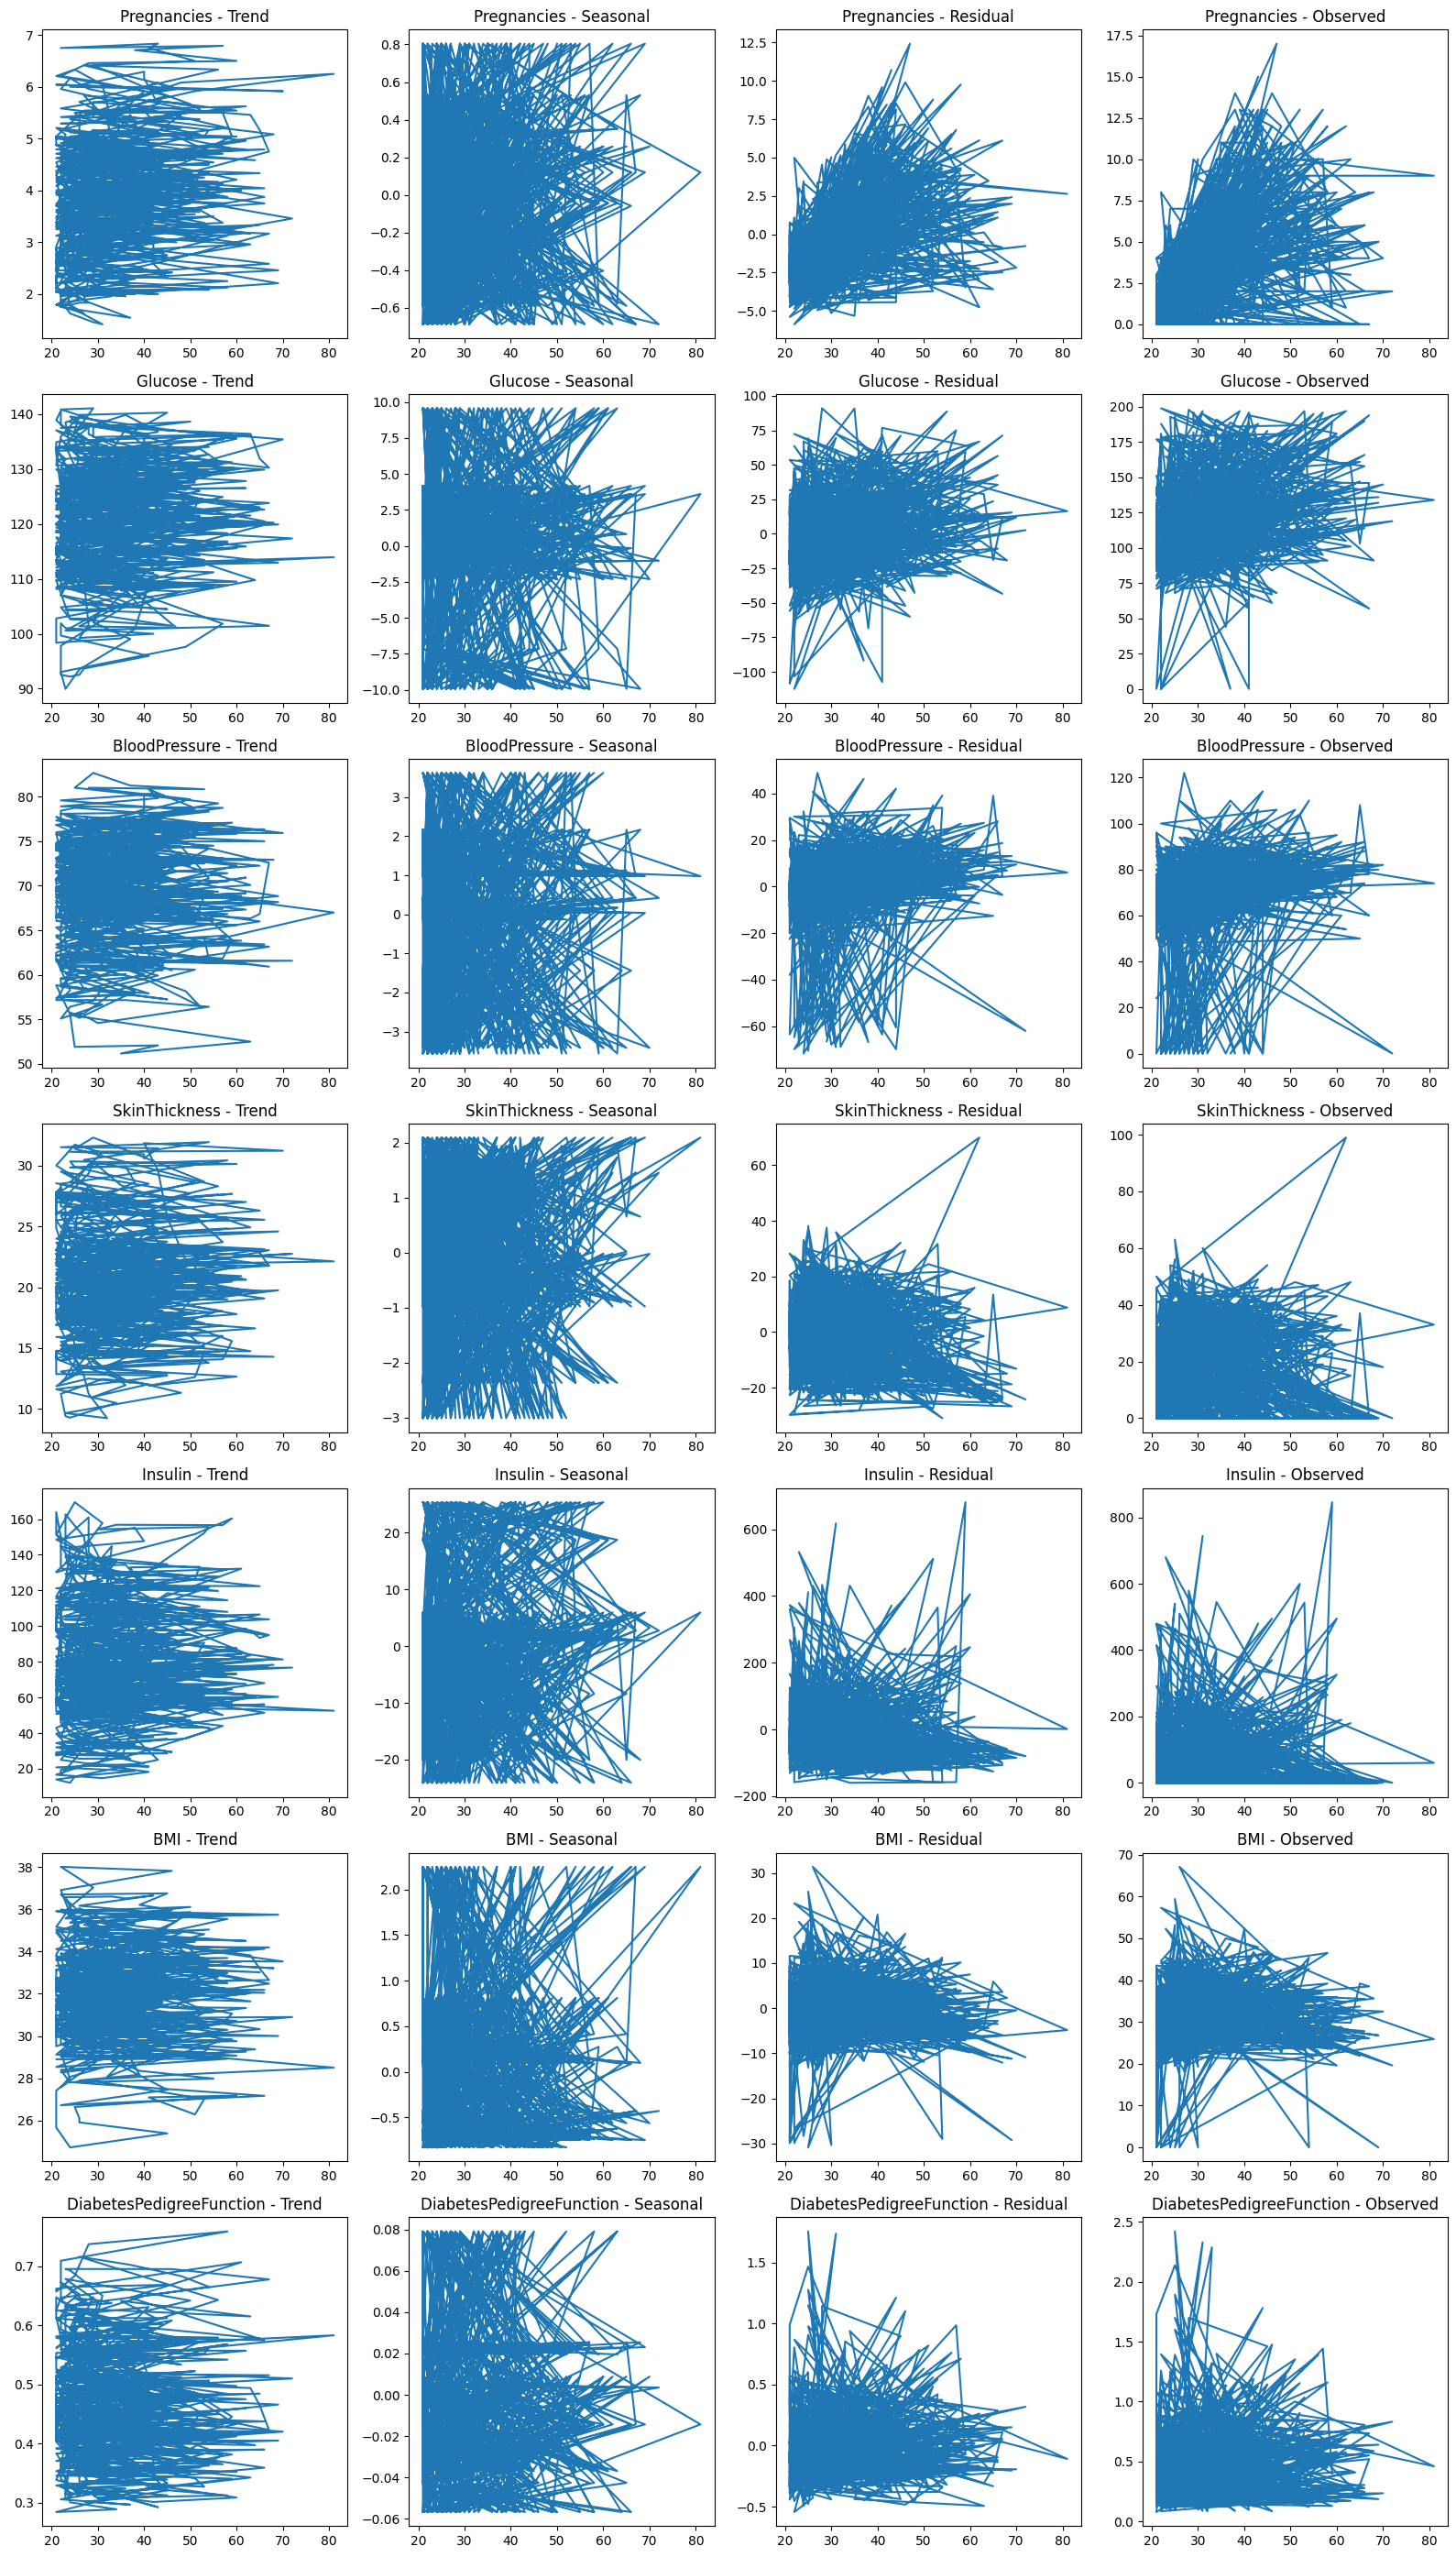

In [37]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming your diabetes dataset is loaded into a DataFrame named diabetes_dataset

# Set up subplots for seasonal decomposition
num_features = len(diabetes_dataset.columns[:-1])  # Exclude the 'Outcome' column
fig, axes = plt.subplots(nrows=num_features, ncols=4, figsize=(16, 4 * num_features))

# Loop through each feature and create subplots for seasonal decomposition
for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    # Create a time-like index for illustration purposes
    diabetes_dataset['Time'] = range(len(diabetes_dataset))
    
    # Decompose the time series
    seasonal_period = 12  # Replace with the appropriate seasonal period
    result = seasonal_decompose(diabetes_dataset[feature], model='additive', period=seasonal_period)
    
    # Plot the decomposed components
    axes[i, 0].plot(result.trend)
    axes[i, 0].set_title(f'{feature} - Trend')
    
    axes[i, 1].plot(result.seasonal)
    axes[i, 1].set_title(f'{feature} - Seasonal')
    
    axes[i, 2].plot(result.resid)
    axes[i, 2].set_title(f'{feature} - Residual')
    
    axes[i, 3].plot(result.observed)
    axes[i, 3].set_title(f'{feature} - Observed')

# Adjust layout
plt.tight_layout()
plt.show()


# 3.9 Hypothesis Testing 

In [38]:
import pandas as pd
from scipy.stats import ttest_ind


# Separate 'Glucose' levels for diabetic and non-diabetic individuals
diabetic_group = diabetes_dataset[diabetes_dataset['Outcome'] == 1]['Glucose']
non_diabetic_group = diabetes_dataset[diabetes_dataset['Outcome'] == 0]['Glucose']

# Perform independent t-test
t_statistic, p_value = ttest_ind(diabetic_group, non_diabetic_group)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (commonly 0.05)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 14.600060005973894
P-value: 8.935431645289913e-43
Reject the null hypothesis


In [39]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

# Step "4" Statistical Analysis 

In [40]:
# getting the statistical measures of the data
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction     Outcome        Time  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876    0.348958  383.500000  
std      7.884160                  0.331329    0.476951  221.846794  
min      0.000000                  0.078000    0.000000    0.000000  
25%     27.300000                  0.243750    0.000000  191.750000  
50%     32.000000                  0.372500    0.000000  383.500000  
75%     36.600000                  0.626250    1.000000  575.250000  
max     67.100000                  2.420000    1.000000  767.000000

In [41]:
# how many diabetic and non-daibetic patients are there in total 
diabetes_dataset['Outcome'].value_counts()  

Outcome
0    500
1    268
Name: count, dtype: int64

 # 0 --> Non-Diabetic

# 1 --> Diabetic

In [42]:
diabetes_dataset.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Time  
Outcome                                                   
0        30.304200                  0.429734  390.834000  
1        35.142537                  0.550500  369.817164

# Step "5"  Seperating data into "X" & "Y"

In [43]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [44]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Age                                                                      
50             6      148             72             35        0  33.6   
31             1       85             66             29        0  26.6   
32             8      183             64              0        0  23.3   
21             1       89             66             23       94  28.1   
33             0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
63            10      101             76             48      180  32.9   
27             2      122             70             27        0  36.8   
30             5      121             72             23      112  26.2   
47             1      126             60              0        0  30.1   
23             1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Time  

In [45]:
print(Y)

Age
50    1
31    0
32    1
21    0
33    1
     ..
63    0
27    0
30    0
47    1
23    0
Name: Outcome, Length: 768, dtype: int64


# Step "6" Data Standarization (pre-processing)

In [46]:
Scaler = StandardScaler()

In [47]:
Scaler.fit(X)

StandardScaler()

In [48]:
# Now we standarized the data 
Standarized_data  = Scaler.transform(X)         # you can use this as well scaler.fit_transform()

In [49]:
print(Standarized_data )

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
  -1.729797  ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -1.72528645]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -1.72077589]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
   1.72077589]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.72528645]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
   1.729797  ]]


In [50]:
print(X)
print("----"*20)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Age                                                                      
50             6      148             72             35        0  33.6   
31             1       85             66             29        0  26.6   
32             8      183             64              0        0  23.3   
21             1       89             66             23       94  28.1   
33             0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
63            10      101             76             48      180  32.9   
27             2      122             70             27        0  36.8   
30             5      121             72             23      112  26.2   
47             1      126             60              0        0  30.1   
23             1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Time  

In [51]:
X = Standarized_data
Y = diabetes_dataset['Outcome']

#  Step "7" Train Test Split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Step "8" Training the Model

# Model 1 "SVM" 

In [54]:
classifier = svm.SVC(kernel='linear')

In [55]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

 # Step "9" Model Evaluation

# Accuracy Score

In [56]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
print(X_train_prediction)

[0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 

In [57]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [58]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [59]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [60]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


# Confusion_Matrix

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
conf_matrix_svm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix - SVM:")
print(conf_matrix_svm)



Confusion Matrix - SVM:
[[91  9]
 [27 27]]


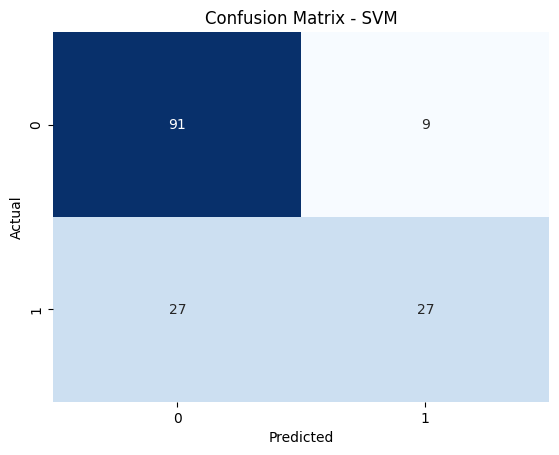

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predictions in conf_matrix_svm
# If it's not probabilities but actual predictions, you might need to convert it to binary predictions

# Plot Confusion Matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification_Report 

In [63]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have predictions in X_test_prediction and actual labels in Y_test
# Replace X_test_prediction and Y_test with your actual variables

# Calculate accuracy
accuracy = accuracy_score(Y_test, X_test_prediction)

# Generate classification report
report = classification_report(Y_test, X_test_prediction)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)


Accuracy: 0.7662337662337663

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



# Classification_Report and Accuracy_Score graphical Representation

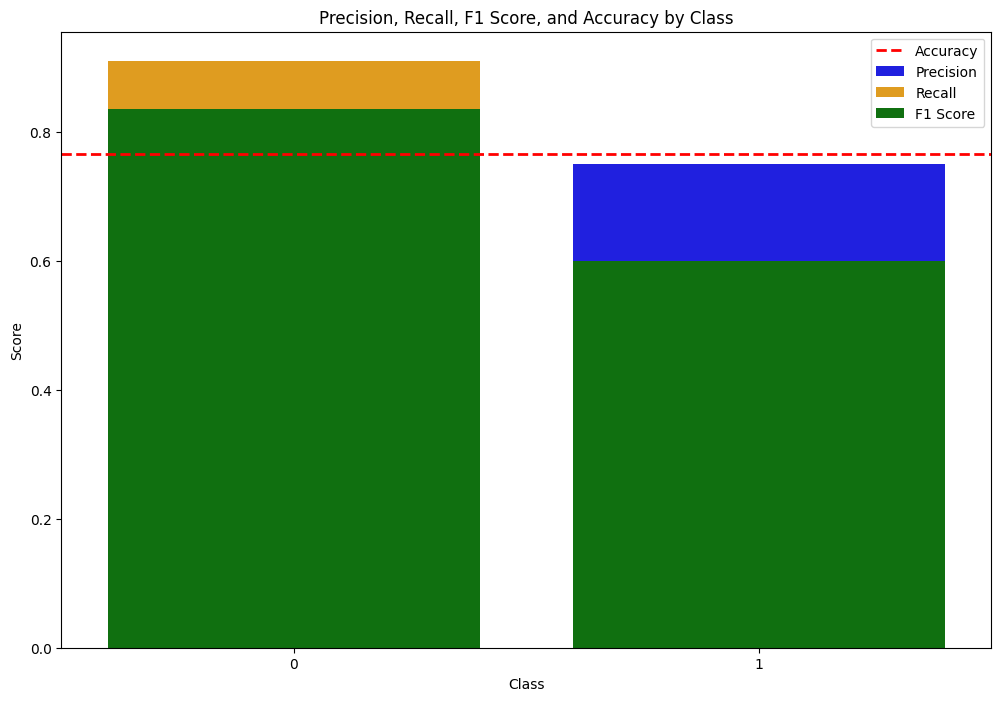

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have predictions in X_test_prediction and actual labels in Y_test
# Replace X_test_prediction and Y_test with your actual variables

# Calculate accuracy
accuracy = accuracy_score(Y_test, X_test_prediction)

# Generate classification report
report_dict = classification_report(Y_test, X_test_prediction, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision = [report_dict[str(class_label)]['precision'] for class_label in report_dict.keys() if class_label.isdigit()]
recall = [report_dict[str(class_label)]['recall'] for class_label in report_dict.keys() if class_label.isdigit()]
f1_score = [report_dict[str(class_label)]['f1-score'] for class_label in report_dict.keys() if class_label.isdigit()]

# Class labels (replace with your actual class labels)
class_labels = [str(class_label) for class_label in report_dict.keys() if class_label.isdigit()]

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=class_labels, y=precision, label='Precision', color='blue')
sns.barplot(x=class_labels, y=recall, label='Recall', color='orange')
sns.barplot(x=class_labels, y=f1_score, label='F1 Score', color='green')

# Plot accuracy as a horizontal line
ax.axhline(accuracy, color='red', linestyle='dashed', linewidth=2, label='Accuracy')

ax.set(title='Precision, Recall, F1 Score, and Accuracy by Class',
       xlabel='Class',
       ylabel='Score')

plt.legend(loc='upper right')
plt.show()


 # Making a Predictive System

In [65]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standarize the data 
standarized_data = Scaler.transform(input_data_reshaped)  
print(standarized_data)
print("-----"*20)                
prediction = classifier.predict(standarized_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723 -1.49975881]]
----------------------------------------------------------------------------------------------------
[1]
The person is diabetic


C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model 2 "Logistic Regression"

In [66]:
from sklearn.linear_model import LinearRegression
LinearRegression_model = LinearRegression()

In [67]:
LinearRegression_model.fit(X_train , Y_train)

LinearRegression()

In [68]:
# accuracy score on the training data
X_train_prediction = LinearRegression_model.predict(X_train)
print(X_train_prediction)

[ 3.16611311e-01  2.28811574e-01  4.57372981e-01  2.07607270e-01
  1.09519188e+00  5.95279517e-01  3.47868509e-01  4.95312486e-01
  2.81975471e-01  1.26636716e-01  1.05928305e+00  4.85549058e-01
  4.98896953e-01  1.16482247e-01  3.12117660e-01 -1.05730363e-01
  1.55764970e-01 -3.48551922e-03  1.55612195e-01  1.83867807e-01
  4.56237634e-01  2.14764808e-01  3.89939759e-01  2.48619569e-01
  2.69526475e-01  2.60520373e-01  5.11734515e-01  3.61734496e-01
 -1.12487553e-01  2.62003340e-01  2.99291637e-01  2.35480515e-01
  6.95707847e-02  1.58844374e-01  5.05673368e-01  5.31068795e-01
  2.90967114e-01  1.61950034e-01  2.94368094e-01 -9.92212493e-02
 -6.82941384e-02  6.93986966e-01  1.18672735e-01  1.08501702e-01
  3.16694246e-01  1.53080403e-01  7.61075473e-02  3.97215421e-01
  9.80859426e-01  2.64478889e-02  4.15885454e-01  1.71996327e-02
  7.20684581e-02  6.87290324e-01  5.04124649e-01  3.01124149e-01
  3.50074631e-01 -2.35617847e-01  3.59557818e-01  1.50599960e-02
  4.60722356e-01  1.73370

# model Evaluation 

# Mean Squared Error

In [69]:
from sklearn.metrics import mean_squared_error


# Calculate Mean Squared Error
mse = mean_squared_error(Y_train, X_train_prediction)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.1534056387985218


# Model  3 " DecisionTreeClassifier"

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Make predictions on the test set
Y_test_prediction = decision_tree_model.predict(X_test)

# Evaluation 

In [72]:
# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_test_prediction)
print("Accuracy:", accuracy)

# Display classification report
classification_report_result = classification_report(Y_test, Y_test_prediction)
print("\nClassification Report:")
print(classification_report_result)

Accuracy: 0.6753246753246753

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.54      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



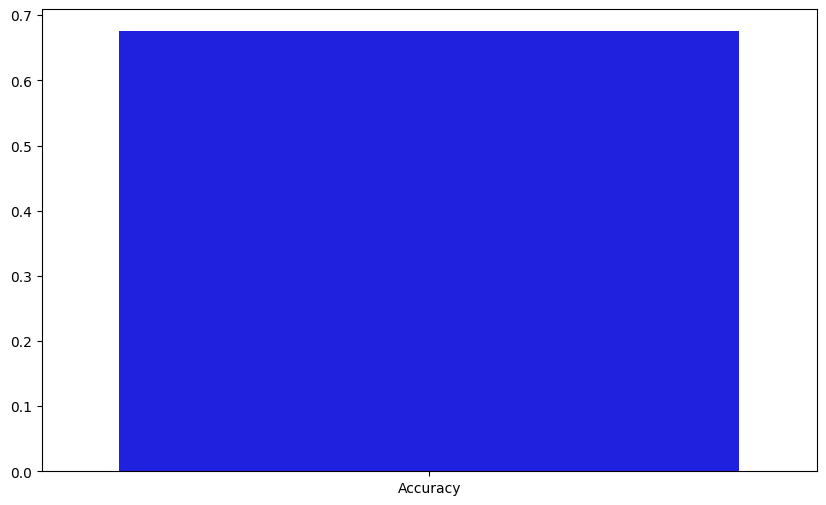

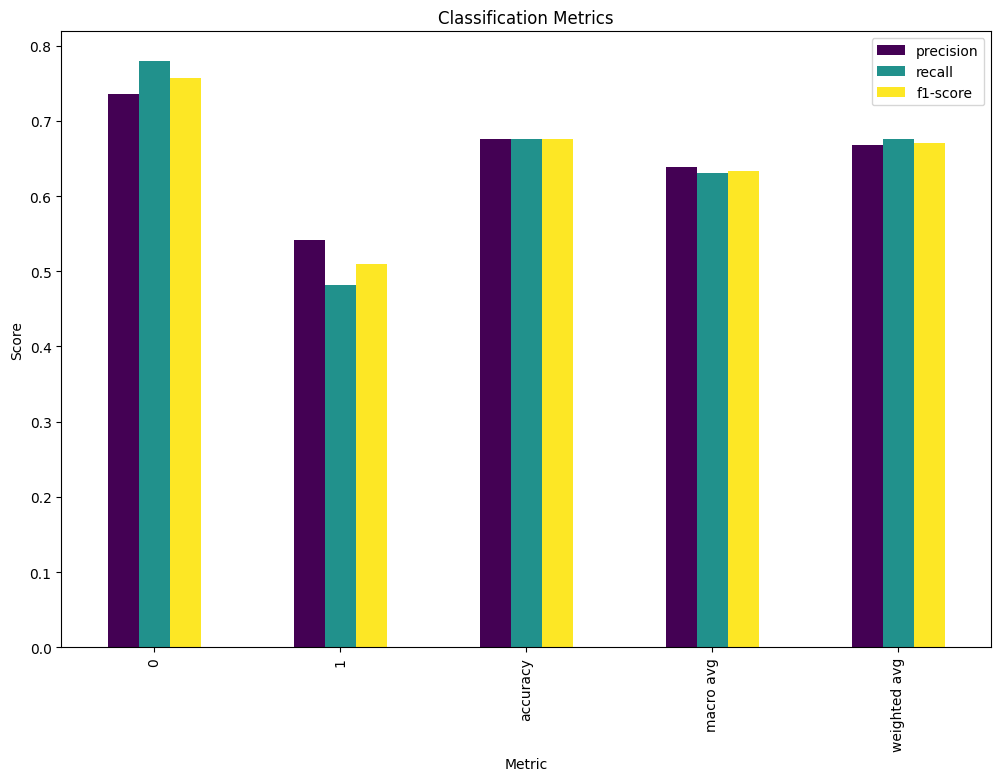

In [73]:
# graph

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_test_prediction)

# Generate classification report
classification_report_result = classification_report(Y_test, Y_test_prediction, output_dict=True)

# Convert classification report to a DataFrame for easier plotting
import pandas as pd
classification_df = pd.DataFrame(classification_report_result).transpose()

# Plot accuracy as a horizontal bar
plt.figure(figsize=(10, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], color='blue')

# Plot precision, recall, and F1-score as vertical bars
classification_df.drop('support', axis=1).plot(kind='bar', colormap='viridis', figsize=(12, 8))
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')

plt.show()


# Model 4 "RandomForestClassifier"

In [74]:
from sklearn.ensemble import RandomForestClassifier
# Create and train a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Make predictions on the test set
Y_test_prediction = random_forest_model.predict(X_test)

In [76]:
# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_test_prediction)
print("Accuracy:", accuracy)

# Display classification report
classification_report_result = classification_report(Y_test, Y_test_prediction)
print("\nClassification Report:")
print(classification_report_result)

Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       100
           1       0.62      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



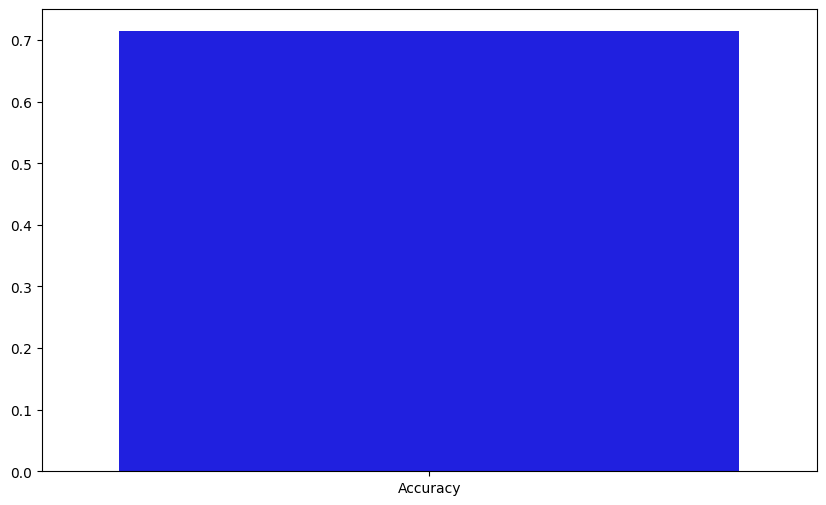

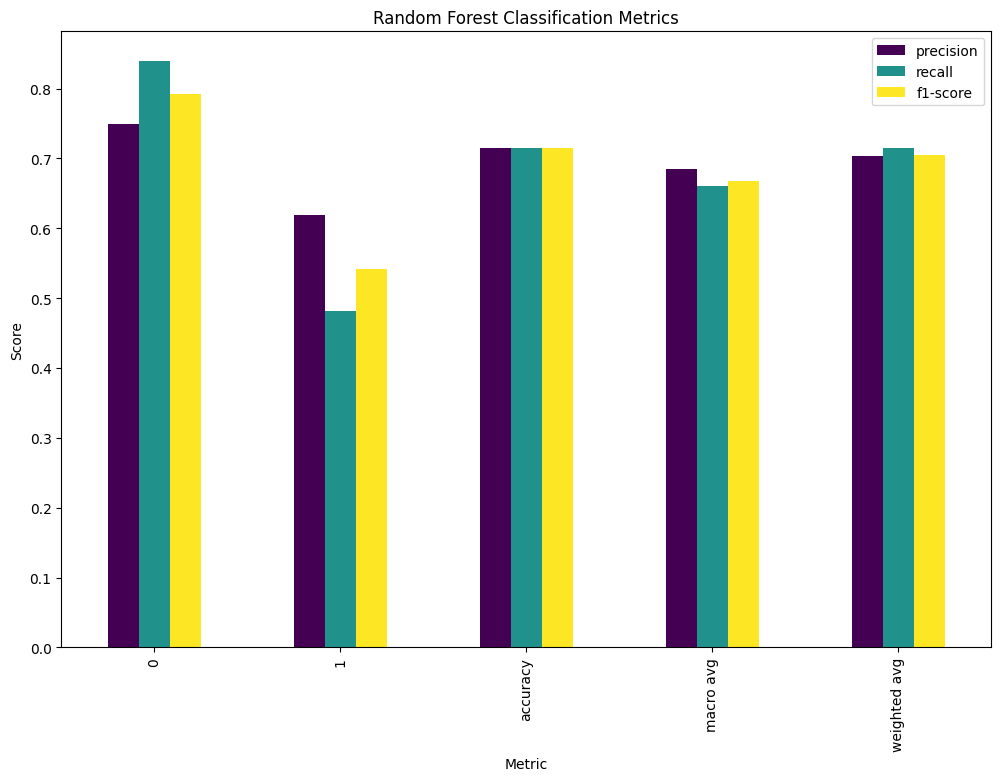

In [77]:
# graph 
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_test_prediction)

# Generate classification report
classification_report_result = classification_report(Y_test, Y_test_prediction, output_dict=True)

# Convert classification report to a DataFrame for easier plotting
import pandas as pd
classification_df = pd.DataFrame(classification_report_result).transpose()

# Plot accuracy as a horizontal bar
plt.figure(figsize=(10, 6))
sns.barplot(x=['Accuracy'], y=[accuracy], color='blue')

# Plot precision, recall, and F1-score as vertical bars
classification_df.drop('support', axis=1).plot(kind='bar', colormap='viridis', figsize=(12, 8))
plt.title('Random Forest Classification Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')

plt.show()

# Hyperparameter tunning 


# SVM

In [78]:
# K fold cross validation 
from sklearn.model_selection import cross_val_score 

In [79]:
# it has better value avergae 
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Create an SVM model with linear kernel and hyperparameters (C=10, gamma='auto')
svm_model = svm.SVC(kernel='linear', C=10, gamma='auto')

# Perform cross-validation
cv_scores = cross_val_score(svm_model, diabetes.data, diabetes.target, cv=5)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)


C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.         0.01123596 0.01136364 0.01136364 0.02272727]


In [80]:
 #Create an SVM model with linear kernel and hyperparameters (C=10, gamma='auto')
svm_model = svm.SVC(kernel='rbf', C=10, gamma='auto')
 #Perform cross-validation
cv_scores = cross_val_score(svm_model, diabetes.data, diabetes.target, cv=5)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)


C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.         0.01123596 0.01136364 0.01136364 0.02272727]


In [81]:

# Create an SVM model with linear kernel and hyperparameters (C=10, gamma='auto')
svm_model = svm.SVC(kernel='linear', C=20, gamma='auto')

# Perform cross-validation
cv_scores = cross_val_score(svm_model, diabetes.data, diabetes.target, cv=5)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)


C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.01123596 0.01123596 0.01136364 0.03409091 0.02272727]


In [82]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Define the SVM model
svm_model = SVC()

# Define the parameter grid to search
param_grid = {'kernel': ['linear', 'rbf'],
              'C': [1, 10, 100],
              'gamma': ['scale', 'auto']}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions on the test set using the best model
y_test_prediction = grid_search.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_prediction)
print("Test Accuracy:", test_accuracy)

C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.017022132796780685
Test Accuracy: 0.011235955056179775


In [83]:
#Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
#Best Score: 0.017022132796780685
#Test Accuracy: 0.011235955056179775

# logistic Regression

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'Y' is your target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Type of regularization
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
Y_pred = grid_search.predict(X_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy on Test Set: 0.7792207792207793


C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

# Randomforest

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'Y' is your target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest model
random_forest = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
Y_pred = grid_search.predict(X_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy on Test Set: 0.7727272727272727


# DecsionTreeClassifier

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'Y' is your target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
Y_pred = grid_search.predict(X_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy on Test Set: 0.7142857142857143


 # Saving the trained model

In [84]:
import pickle

In [85]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))   

In [86]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [87]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
